In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import math
from sklearn import neighbors
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from scipy import stats


In [2]:
df= pd.read_csv('real_property_residential_characteristics.csv')
df.head(20)

,PIN,SCHEDNUM,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
0,160431419,4100122000,1,1,"REITHER,JOHN FAMILY TRUST",NaN,17675,E,64TH,AVE,...,1,0.000,264000.000,0.000,19008.000,19010.000,0.000,4,GATEWAY N,T3 R66 S4 SW/4 E 660FT EXC S 30FT OF SD SEC ...
1,160431427,4100123000,1,1,"GARRISON,DONALD H",NaN,17675,E,64TH,AVE,...,1,0.000,208200.000,0.000,14990.000,14990.000,0.000,4,GATEWAY N,T3 R66 S4 SW/4 E 660FT EXC S 30FT OF SD SEC ...
2,163087844,10201002000,1,1,VACHOVSKY FAMILY TRUST,NaN,6151,NaN,AVENIDA PICACHO,NaN,...,1,40100.000,216200.000,2887.000,15566.000,15570.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L2
3,163087852,10201003000,1,1,BISCAY REALTY LLC,NaN,10798,NaN,LISMORE,WAY,...,1,25300.000,211100.000,1822.000,15200.000,15200.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L3
4,163087861,10201004000,1,1,"SIERRA,JUAN ROBERTO",NaN,5837,NaN,BISCAY,ST,...,1,25300.000,188900.000,1822.000,13601.000,13600.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L4
5,163087879,10201005000,1,1,O AND P ENTERPRISES LLC,NaN,3670,NaN,VESTAL,LOOP,...,1,25300.000,210300.000,1822.000,15142.000,15140.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L5
6,163087887,10201006000,1,1,"MCCLEAF,BARBARA",NaN,5833,NaN,BISCAY,ST,...,1,25300.000,210300.000,1822.000,15142.000,15140.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L6
7,163087895,10201007000,1,1,"MURPHY,JOSEPH",NaN,5827,NaN,BISCAY,ST,...,1,25300.000,202200.000,1822.000,14559.000,14560.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L7
8,163087909,10201008000,1,1,"CRAVEN,BRANDEN",NaN,5825,NaN,BISCAY,ST,...,1,25300.000,189000.000,1822.000,13608.000,13610.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L8
9,163087917,10201009000,1,1,"SOSA-IBANEZ,PERLA",NaN,5823,NaN,BISCAY,ST,...,1,32700.000,222000.000,2354.000,15984.000,15980.000,0.000,4,GATEWAY N,FIRST CREEK FLG NO 1 B1 L9


In [3]:
df.columns

Index(['PIN', 'SCHEDNUM', 'CD', 'OFCARD', 'OWNER', 'CO_OWNER', 'OWNER_NUM',
       'OWNER_DIR', 'OWNER_ST', 'OWNER_TYPE', 'OWNER_APT', 'OWNER_CITY',
       'OWNER_STATE', 'OWNER_ZIP', 'SITE_NBR', 'SITE_DIR', 'SITE_NAME',
       'SITE_MODE', 'SITE_MORE', 'TAX_DIST', 'PROP_CLASS', 'PROPERTY_CLASS',
       'ZONE10', 'D_CLASS_CN', 'LAND_SQFT', 'AREA_ABG', 'BSMT_AREA',
       'FBSMT_SQFT', 'GRD_AREA', 'STORY', 'STYLE_CN', 'BED_RMS', 'FULL_B',
       'HLF_B', 'CCYRBLT', 'CCAGE_RM', 'UNITS', 'ASMT_APPR_LAND',
       'TOTAL_VALUE', 'ASDLAND', 'ASSESS_VALUE', 'ASMT_TAXABLE',
       'ASMT_EXEMPT_AMT', 'NBHD_1', 'NBHD_1_CN', 'LEGL_DESCRIPTION'],
      dtype='object')

In [4]:
df.count()

PIN                 206053
SCHEDNUM            206053
CD                  206053
OFCARD              206053
OWNER               206053
CO_OWNER              6913
OWNER_NUM           206053
OWNER_DIR           119823
OWNER_ST            206053
OWNER_TYPE          199948
OWNER_APT            41328
OWNER_CITY          206053
OWNER_STATE         206053
OWNER_ZIP           206044
SITE_NBR            206053
SITE_DIR            198026
SITE_NAME           206053
SITE_MODE           205896
SITE_MORE            49942
TAX_DIST            206053
PROP_CLASS          206052
PROPERTY_CLASS      205845
ZONE10              206053
D_CLASS_CN          206053
LAND_SQFT           205390
AREA_ABG            206053
BSMT_AREA           206053
FBSMT_SQFT          206053
GRD_AREA            206053
STORY               206053
STYLE_CN            194265
BED_RMS             206053
FULL_B              194265
HLF_B               194265
CCYRBLT             194265
CCAGE_RM            194265
UNITS               206053
A

In [5]:
df.describe()

,PIN,SCHEDNUM,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,...,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1
count,206053.000,206053.000,206053.000,206053.000,206053.000,206052.000,205390.000,206053.000,206053.000,206053.000,...,194265.000,194265.000,206053.000,206052.000,206052.000,206052.000,206052.000,206052.000,206052.000,206053.000
mean,162005918.760,408427202321.414,1.000,1.005,3601.152,1245.146,5490.745,1340.425,490.765,285.189,...,1959.984,690.616,0.966,147029.073,395998.783,11083.002,29022.290,28654.553,368.561,420.218
std,1070496.372,228033642061.231,0.000,0.164,3782.554,1087.661,15900.524,791.800,553.090,444.141,...,34.547,952.534,0.327,222482.605,352311.463,43904.514,47939.151,25203.745,40930.857,238.959
min,160088986.000,4100122000.000,1.000,1.000,1.000,100.000,0.000,0.000,0.000,0.000,...,1873.000,0.000,0.000,0.000,100.000,0.000,7.000,0.000,0.000,1.000
25%,161149941.000,222407029029.000,1.000,1.000,1245.000,1112.000,2310.000,887.000,0.000,0.000,...,1940.000,0.000,1.000,38300.000,232400.000,2830.000,16848.000,16750.000,0.000,219.000
50%,161792096.000,507137018000.000,1.000,1.000,2664.000,1112.000,5360.000,1167.000,300.000,0.000,...,1959.000,0.000,1.000,89700.000,327900.000,6566.000,23724.000,23640.000,0.000,520.000
75%,162913827.000,536211089089.000,1.000,1.000,4584.000,1114.000,6820.000,1648.000,928.000,600.000,...,1985.000,2001.000,1.000,209400.000,474300.000,15336.000,34315.000,34210.000,0.000,599.000
max,164278311.000,1223100055000.000,1.000,25.000,99995.000,9989.000,2958350.000,18231.000,8712.000,7565.000,...,2018.000,2160.000,13.000,62161400.000,62161400.000,18026806.000,18026806.000,3744710.000,18026810.000,906.000


In [6]:
print(df.count())
#Count number of unique data points (PIN is the identifier for each separate parcel)
print(df.PIN.nunique())

PIN                 206053
SCHEDNUM            206053
CD                  206053
OFCARD              206053
OWNER               206053
CO_OWNER              6913
OWNER_NUM           206053
OWNER_DIR           119823
OWNER_ST            206053
OWNER_TYPE          199948
OWNER_APT            41328
OWNER_CITY          206053
OWNER_STATE         206053
OWNER_ZIP           206044
SITE_NBR            206053
SITE_DIR            198026
SITE_NAME           206053
SITE_MODE           205896
SITE_MORE            49942
TAX_DIST            206053
PROP_CLASS          206052
PROPERTY_CLASS      205845
ZONE10              206053
D_CLASS_CN          206053
LAND_SQFT           205390
AREA_ABG            206053
BSMT_AREA           206053
FBSMT_SQFT          206053
GRD_AREA            206053
STORY               206053
STYLE_CN            194265
BED_RMS             206053
FULL_B              194265
HLF_B               194265
CCYRBLT             194265
CCAGE_RM            194265
UNITS               206053
A

In [7]:
#Create subset dataframe
df = df[['TOTAL_VALUE', 'AREA_ABG', 'BED_RMS', 'FULL_B', 'HLF_B', 'OWNER_ZIP']]

In [8]:
print(df.head(20))

    TOTAL_VALUE  AREA_ABG  BED_RMS  FULL_B  HLF_B   OWNER_ZIP
0    264000.000      1269        3   1.000  1.000  80249-6409
1    208200.000      1682        3   1.000  0.000  80249-6409
2    216200.000      1716        3   2.000  1.000       92067
3    211100.000      1523        3   2.000  1.000  80126-7579
4    188900.000      1401        3   1.000  1.000  80249-8315
5    210300.000      1540        3   2.000  1.000  80023-4657
6    210300.000      1540        3   2.000  1.000  80249-8315
7    202200.000      1401        3   2.000  1.000  80249-8315
8    189000.000      1401        3   1.000  1.000  80249-8315
9    222000.000      1779        3   2.000  1.000  80249-8315
10   212400.000      1716        3   2.000  1.000  80249-8315
11   200500.000      1401        3   2.000  1.000  80249-8315
12   210300.000      1540        3   2.000  1.000  80249-8315
13   210300.000      1540        3   2.000  1.000  80249-8315
14   203500.000      1401        3   2.000  1.000  80249-8315
15   225

In [9]:
#combine bathroom types into one 'total bathrooms' column
df['Bathrooms'] = df['FULL_B']+df['HLF_B']
df = df.drop(['FULL_B', 'HLF_B'], axis=1)

In [10]:
#Rename the columns
df.columns = ['Total_Value', 'Sqft', 'Bedrooms', 'Zip_Code', 'Bathrooms']
df.head(5)

,Total_Value,Sqft,Bedrooms,Zip_Code,Bathrooms
0,264000.000,1269,3,80249-6409,2.000
1,208200.000,1682,3,80249-6409,1.000
2,216200.000,1716,3,92067,3.000
3,211100.000,1523,3,80126-7579,3.000
4,188900.000,1401,3,80249-8315,2.000


In [11]:
#Remove last four digits and the dash of the zip code
df['Zip_Code'] = df['Zip_Code'].str[:5]
df.head(20)

,Total_Value,Sqft,Bedrooms,Zip_Code,Bathrooms
0,264000.000,1269,3,80249,2.000
1,208200.000,1682,3,80249,1.000
2,216200.000,1716,3,92067,3.000
3,211100.000,1523,3,80126,3.000
4,188900.000,1401,3,80249,2.000
5,210300.000,1540,3,80023,3.000
6,210300.000,1540,3,80249,3.000
7,202200.000,1401,3,80249,3.000
8,189000.000,1401,3,80249,2.000
9,222000.000,1779,3,80249,3.000


In [12]:
df.dropna(subset = ['Total_Value'], inplace = True)
df.head(5)

,Total_Value,Sqft,Bedrooms,Zip_Code,Bathrooms
0,264000.000,1269,3,80249,2.000
1,208200.000,1682,3,80249,1.000
2,216200.000,1716,3,92067,3.000
3,211100.000,1523,3,80126,3.000
4,188900.000,1401,3,80249,2.000


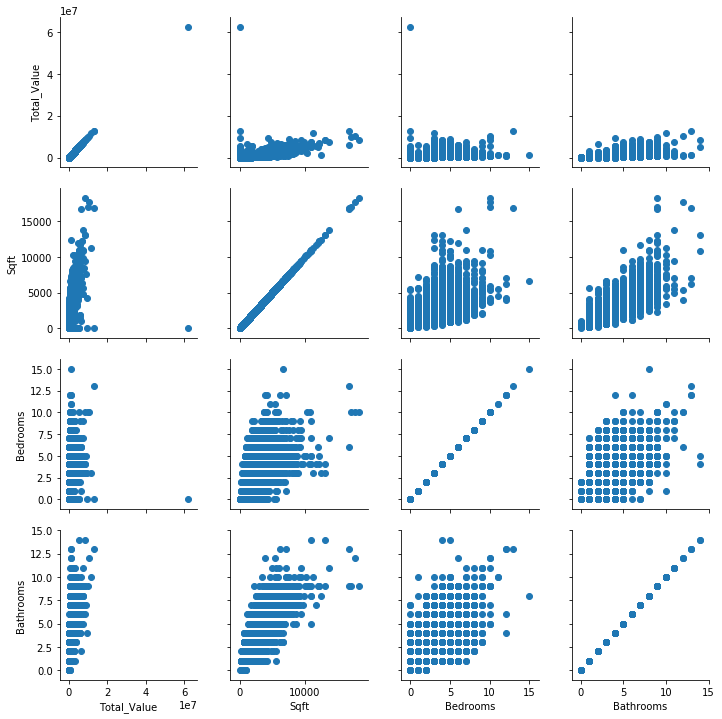

In [13]:
g = sns.PairGrid(df)
g = g.map(plt.scatter)

In [14]:
#Looks like there's an outlier in Total value, let's see what it is.
df['Total_Value'].describe()

count     206052.000
mean      395998.783
std       352311.463
min          100.000
25%       232400.000
50%       327900.000
75%       474300.000
max     62161400.000
Name: Total_Value, dtype: float64

In [15]:
#Let's remove it

tvmax = df.loc[df['Total_Value'].idxmax()]
df = df[df.Total_Value !=  6.216140e+07]
df['Total_Value'].describe()

count     206051.000
mean      395699.025
std       324975.579
min          100.000
25%       232400.000
50%       327900.000
75%       474300.000
max     12912800.000
Name: Total_Value, dtype: float64

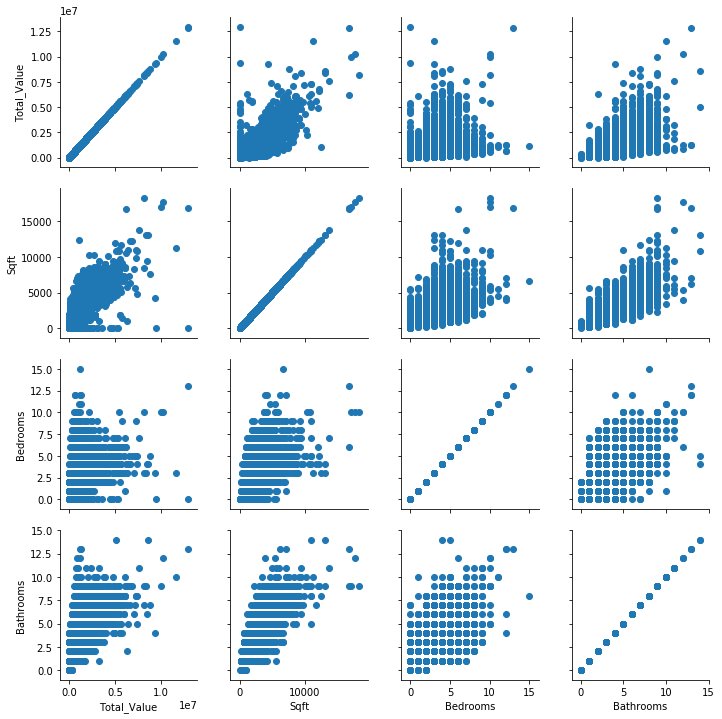

In [16]:
g = sns.PairGrid(df)
g = g.map(plt.scatter)

In [66]:
#there seems to be a lot of bedrooms of 0, so let's check those out.
print(df.Bedrooms.value_counts(ascending=False))
print(df.loc[df['Bedrooms'] == 0])

2     80827
3     70629
4     19570
1     18453
5      2653
6       483
7       150
8        57
9        25
10       13
Name: Bedrooms, dtype: int64
Empty DataFrame
Columns: [Total_Value, Sqft, Bedrooms, Zip_Code, Bathrooms]
Index: []


In [67]:
#Something funky is going on with that data. To be safe, let's remove all instances of zero bedroooms
df = df[df.Bedrooms != 0]
print(df.loc[df['Bedrooms'] == 0])

Empty DataFrame
Columns: [Total_Value, Sqft, Bedrooms, Zip_Code, Bathrooms]
Index: []


In [17]:
#Double Check there is no missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
Total_Value        0
Sqft               0
Bedrooms           0
Zip_Code           9
Bathrooms      11786
dtype: int64


In [18]:
#fill bathrooms missing values with the mean
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
Total_Value    0
Sqft           0
Bedrooms       0
Zip_Code       9
Bathrooms      0
dtype: int64


In [19]:
#remove rows with missing zip codes
df['Zip_Code'].replace('', np.nan, inplace=True)
df.dropna(subset=['Zip_Code'], inplace=True)
print("Missing values per column:")
print(df.apply(num_missing, axis=0))



Missing values per column:
Total_Value    0
Sqft           0
Bedrooms       0
Zip_Code       0
Bathrooms      0
dtype: int64


             Total_Value  Sqft  Bedrooms  Bathrooms
Total_Value        1.000 0.768     0.419      0.587
Sqft               0.768 1.000     0.696      0.720
Bedrooms           0.419 0.696     1.000      0.448
Bathrooms          0.587 0.720     0.448      1.000


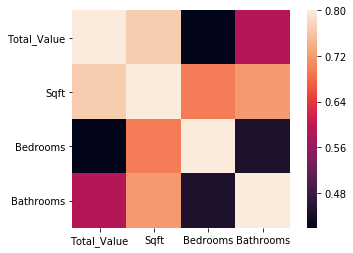

In [20]:
#check for collinearity
         
corrmat = df.corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)

In [21]:
#View data types for the model
print(df.dtypes)

Total_Value    float64
Sqft             int64
Bedrooms         int64
Zip_Code        object
Bathrooms      float64
dtype: object


In [65]:
#Looks like we need to drop zip code since the p-values are > 0.05 (from the first model, 
#which I remvoved from the code since it took so long to run. Let's remove it and redo the model

def real_estate_price(df, linear_formula):
    lg_model = smf.ols(formula=linear_formula, data=df).fit()
    print ("R squared: ", lg_model.rsquared)
    print ("\nParameters\n\n", lg_model.params)
    print ("\nP-values\n\n", lg_model.pvalues)
    print ("\nConfidence Intervals")
    display(lg_model.conf_int())

R squared:  0.6073240340582777

Parameters

 Intercept    47995.584
Sqft           357.877
Bedrooms    -71933.418
Bathrooms    18750.354
dtype: float64

P-values

 Intercept   0.000
Sqft        0.000
Bedrooms    0.000
Bathrooms   0.000
dtype: float64

Confidence Intervals


,0,1
Intercept,45272.068,50719.101
Sqft,355.772,359.982
Bedrooms,-73200.546,-70666.291
Bathrooms,17438.290,20062.419


In [25]:
#Something funky is going on with that data. To be safe, let's remove all instances of zero bedroooms
df = df[df.Bedrooms != 0]
print(df.loc[df['Bedrooms'] == 0])

Empty DataFrame
Columns: [Total_Value, Sqft, Bedrooms, Zip_Code, Bathrooms]
Index: []


In [69]:
target = pd.DataFrame(df.Total_Value)
X = df[['Sqft','Bedrooms','Bathrooms']]
y = target
model = smf.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()
score = cross_val_score(regr,X, y)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.34 (+/- 0.68)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [60]:
#Build KNN model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_model = knn.fit(X, y)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Unweighted Accuracy: 0.19 (+/- 0.99)


Looks like both of these tests are pretty bad, but it seems like linear regression is a better fit for this type of analysis